# Stability of Forward and Backward Euler

\begin{equation*}
Y^{n+1}   = Y^n +{\Delta}tf(Y^n, t^n)
\end{equation*}

\begin{equation*}
\frac{dy}{dt} = {\lambda}y \quad \quad y(0) = y_0
\end{equation*}

\begin{equation*}
y(t) = y_0e^{{\lambda}t} \quad \quad {\lambda} = -8
\end{equation*}

In [1]:
#import external modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# def forward_euler(y0, t0, tf, dt, f):
def forward_euler(f, t, y0, dt):
    """
    Implementation of the Forward Euler method 
    y[i+1] = y[i] + h * f(x[i], y[i]) where f(x[i], y[i]) is the differntial 
    equation evaluated at x[i] and y[i]
    Input:
        f - function f(y,t)
        t - data structure is a numpy array with t[0] initial time 
        and t[-1] final time
        y0 - data structure is a numpy array with initial value 1.0
        dt - data structure is a numpy array time step
    Output:
        x - vector of time steps 
        y - vector of approximate solutions
    """
    #return evenly spaced values between 0.0 and 1.0+h with itervals of h
    #this creates time intervals  
    x = np.arange(t[0], t[-1]+dt, dt)

    #initialize y by returning a numpy array with shape 101, filled with zeros 
    #this preallocation is necessary for time reasons and to add values into array
    y = np.zeros(len(x+1))

    #assign time at position 0 to starting time (0.0) and set 
    #approximation at time step 0 = 1.0 which is 
    #the initial value given 
    x[0], y[0] = t[0] ,y0

    #apply Euler's method 
    for i in range(1, len(x)):
        y[i] = y[i-1] + dt * f(x[i - 1], y[i - 1])

    
    #return time (x) and approximations (y)
    return x, y

In [4]:
import numpy as np
import pandas as pd 

def newtons_method(maxIter, tol, f, f_prime, x0):
    """
    Implementation of Newton's Method
    Input: 
        maxIter - maximum number of iterations
        tol - telerance used for stopping criteria 
        f - the function handle for the function f(x)
        f_prime - the function handle for the function's derivative
        x0 - the initial point 
    Output: 
        x1 - approximations 
        iter1 - number of iterations 
    """
    #begin counting iterations 
    iter1 = 0
    x1 = 0
    
    #iterate while the iteration counter is less than your iteration cap and 
    #the function value is not close to 0
    while (iter1 < maxIter and abs(f(x0)) > tol):
        
        #Newton's method definition 
        x1 = x0 - f(x0)/f_prime(x0)
        
        #update counter 
        iter1 += 1
        
        #disrupt loop if error is less than your tolerance 
        if (abs(x1 - x0) < tol):
            break
        #update position
        else:
            x0 = x1
        
    return x1, iter1

In [5]:
#import external modules 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Psudocode of Backward Euler 
def backward_euler(y0, t, dt, f, fdy):
    
    #return evenly spaced values between 0.0 and 1.0+h with itervals of h
    #this creates time intervals  
    T = np.arange(t[0], t[-1]+dt, dt)

    #initialize y by returning a numpy array with shape 101, filled with zeros 
    #this preallocation is necessary for time reasons and to add values into array
    Y = np.zeros(len(T))

    #assign time at position 0 to starting time (0.0) 
    #and set approximation at time step 0 = 1.0 which 
    #is the initial value given 
    T[0], Y[0] = t[0] ,y0

    #apply Euler's method 
    for i in range(1, len(T)):

        Y[i] = backward_euler_step(Y[i-1], T[i], dt, f, fdy)
    
    return Y, T

#function for one step of backward euler 
def backward_euler_step(YN, TNext, dt, f, fdy):
    
    #define your maximumiterations and tolerance for newtons_method 
    max_iterations = 1000
    tolerance = 1e-06
    
    #define g and gdy
    g = lambda y: y-YN-dt*f(y, TNext)
    gdy = lambda y: 1-dt*fdy(y, TNext)
    
    y_next, iteration = newtons_method(max_iterations, tolerance, g, gdy, YN)
    
    return y_next

## Code Deliverable 

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

def stabilityPlot(func):
    
    x = np.linspace(-5, 5, 350)
    y = np.linspace(-5, 5, 350)
    
    X, Y = np.meshgrid(x, y)
    
    stability = np.zeros((350,len(x)))
    
    for i in range(1, len(X)):
        for k in range(1, len(Y)):
            z = X[i:k] + 1j*Y[i:k]
            stability[i:k] = (abs(func(z))<1)
            
    plt.contourf(X, Y, stability, 2)

## Exercise 

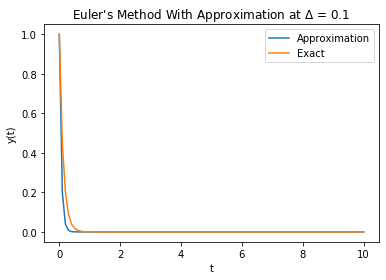

In [11]:
#Forward Euler dt = 0.1
#define dt 
dt = 0.1 

#define f and xact lambda functions
f = lambda  t, y: (-8*y)
exact = lambda x : np.exp(-8*x)

#initialize t(start) and t(final) can index them as start (t[0]) final (t[-1])
t = np.array([0.0, 10.0])

#IVP initial value y(0) = 1
y0 = np.array([1.0])

#call function forward_euler
ts, ys = forward_euler(f, t, y0, dt)

#plot approx vs exact 
plt.plot(ts, ys, label='Approximation')
plt.plot(ts, exact(ts), label='Exact')
plt.title("Euler's Method With Approximation at ${\Delta}$ = 0.1")
plt.xlabel('t'),
plt.ylabel('y(t)')
plt.legend()

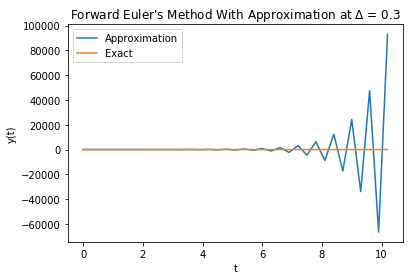

In [12]:
#Forward Euler dt = 0.3
#define dt 
dt = 0.3 

#call function forward_euler
ts, ys = forward_euler(f, t, y0, dt)

#plot approx vs exact 
plt.plot(ts, ys, label='Approximation')
plt.plot(ts, exact(ts), label='Exact')
plt.title("Forward Euler's Method With Approximation at ${\Delta}$ = 0.3")
plt.xlabel('t'),
plt.ylabel('y(t)')
plt.legend()

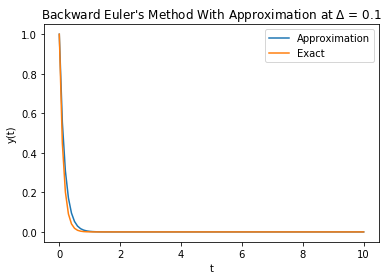

In [13]:
#Backward Euler dt = 0.1
#define dt
dt = 0.1

#define lambda functions for f, fdy, and exact 
f = lambda  y, t: (-8*y)
fdy = lambda y, t: -8
exact = lambda x : np.exp(-8*x)

#initialize t(start) and t(final) can index them as start (t[0]) final (t[-1])
t = np.array([0.0, 10.0])

#IVP initial value y(0) = 1
y0 = np.array([1.0])

#call function backward_euler
ys, ts = backward_euler(y0, t, dt, f, fdy)

plt.plot(ts, ys, label='Approximation')
plt.plot(ts, exact(ts), label='Exact')
plt.title("Backward Euler's Method With Approximation at ${\Delta}$ = 0.1")
plt.xlabel('t'),
plt.ylabel('y(t)')
plt.legend()

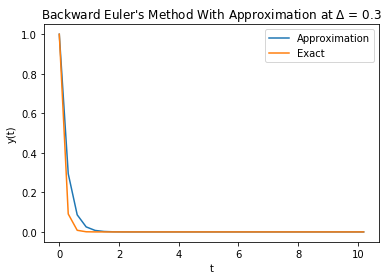

In [14]:
#Backward Euler dt = 0.3
#define dt 
dt = 0.3 

#call function forward_euler
ys, ts = backward_euler(y0, t, dt, f, fdy)

plt.plot(ts, ys, label='Approximation')
plt.plot(ts, exact(ts), label='Exact')
plt.title("Backward Euler's Method With Approximation at ${\Delta}$ = 0.3")
plt.xlabel('t'),
plt.ylabel('y(t)')
plt.legend()

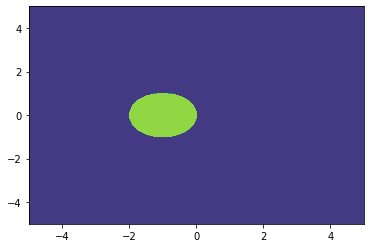

In [15]:
#amplification factor for Forward Euler 
fe_amp = lambda z: (1 + z)
stabilityPlot(fe_amp)

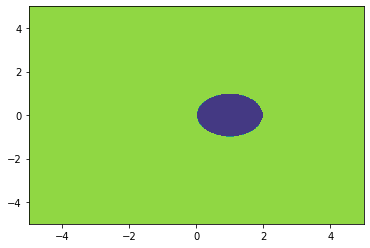

In [16]:
#amplification factor for Backward Euler
be_amp = lambda z: (1 - z)**-1
stabilityPlot(be_amp)

# Midpoint Method

## Exercise

Region of stability of Midpoint Method

\begin{equation*}
Y^{n+1}   = Y^n +{\Delta}tf(Y^n+\frac{{\Delta}t}{2}f(Y^n,t^n),t^n+\frac{{\Delta}t}{2})
\end{equation*}

\begin{equation*}
k_1 = {\Delta}tf(f(Y^n,t^n)) \\
= {\Delta}t{\lambda}Y^n
\end{equation*}

\begin{equation*}
k_2 = {\Delta}tf(Y^n+\frac{k_1}{2}, t^n + \frac{{\Delta}t}{2}) \\
= {\Delta}tf(Y^n + \frac{{\Delta}t{\lambda}Y^n}{2}, t^n +\frac{{\Delta}t{\lambda}^2Y^n}{2})
\end{equation*}

\begin{equation*}
Y^{n+1}   = Y^n +k_2
\end{equation*}

\begin{equation*}
Y^{n+1} = Y^n + {\Delta}t({\lambda}Y^n +\frac{{\Delta}t{\lambda}^2Y^n}{2}) \\
= Y^n(1+{\lambda}{\Delta}t + \frac{({\Delta}t{\lambda})^2}{2})
\end{equation*}

\begin{equation*}
{\Lambda}(z) = 1 + z + \frac{z^2}{2}
\end{equation*}

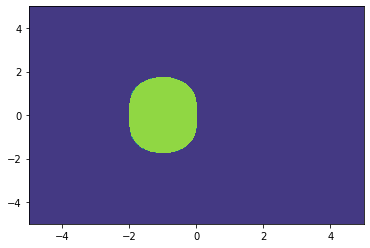

In [17]:
#amplification factor for Midpoint Method
midpoint_amp = lambda z: (1 + z + (z)**2/2)
stabilityPlot(midpoint_amp)

# Runge-Kutta Methods

## Code Deliverable 

In [18]:
def rk4(f, y0, t0, tf, dt):
    
    #Initialize error vector
    err = []
    
    #print tabulated results 
    print("Results:\n\ndt\tapprox\t\terror\n")
    
    #iterate through eatch delta t
    for h in dt:
        
        #return evenly spaced values between 0.0 and 1.0+h with itervals of h
        #this creates time intervals  
        t = np.arange(t0, tf+h, h)
        
        #initialize y by returning a numpy array with shape 101, filled with zeros 
        #this preallocation is necessary for time reasons and to add values into array
        y = np.zeros(len(t+1))
        
        #assign time at position 0 to starting time (0.0) and set 
        #approximation at time step 0 = 1.0 which is 
        #the initial value given 
        t[0], y[0] = t0, y0 
        
        #apply rk4
        for i in range(1, len(t)):
            
            k1 = h * f(y[i], t[i])
            k2 = h * f(y[i] + 0.5 * k1, t[i] + 0.5 * h)
            k3 = h * f(y[i] + 0.5 * k2, t[i] + 0.5 * h)
            k4 = h * f(y[i] + k3, t[i] + h)
            
            y[i] = y[i-1] + (k1 + 2 * k2 + 2 * k3 + k4)/6
            t[i] = t0 + i*h
            
        #calculate error and append values for each h to err list
        e = [np.abs(y[-1] - exact(t[-1]))]
        err.append(e)
        
        #Print tabulated results 
        print('{:.4f}'.format(round(h,4)), '|', 
              '{:.4f}'.format(round(y[-1],6)), '|' , err[-1])
        
    #Plot log log plot 
    plt.loglog(dt, err)
    plt.title("Error for each dt when t = 1")
    plt.xlabel('Step size dt')
    plt.ylabel("Error")
        
    return t, y
    
    

## Exercise

Results:

dt	approx		error

0.2500 | -1.0000 | [0.5835951825092973]
0.1250 | -1.0000 | [0.5835951825092973]
0.0625 | -1.0000 | [0.5835951825092973]
0.0312 | -1.0000 | [0.5835951825092973]
0.0156 | -1.0000 | [0.5835951825092973]


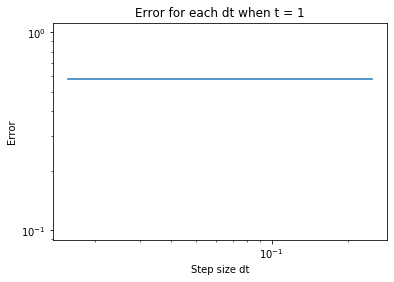

In [19]:
f = lambda y, t: -y * np.sin(t) 
exact = lambda t: -np.exp(1-np.cos(t))

y0 = -1
t0 = 0
tf = 1

dt = np.asarray([1/(2**x) for x in range(2,7)])

ts, ys = rk4(f, y0, t0, tf, dt)

In [43]:
ys

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [25]:
ts

array([0.      , 0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125,
       0.09375 , 0.109375, 0.125   , 0.140625, 0.15625 , 0.171875,
       0.1875  , 0.203125, 0.21875 , 0.234375, 0.25    , 0.265625,
       0.28125 , 0.296875, 0.3125  , 0.328125, 0.34375 , 0.359375,
       0.375   , 0.390625, 0.40625 , 0.421875, 0.4375  , 0.453125,
       0.46875 , 0.484375, 0.5     , 0.515625, 0.53125 , 0.546875,
       0.5625  , 0.578125, 0.59375 , 0.609375, 0.625   , 0.640625,
       0.65625 , 0.671875, 0.6875  , 0.703125, 0.71875 , 0.734375,
       0.75    , 0.765625, 0.78125 , 0.796875, 0.8125  , 0.828125,
       0.84375 , 0.859375, 0.875   , 0.890625, 0.90625 , 0.921875,
       0.9375  , 0.953125, 0.96875 , 0.984375, 1.      ])

## Exercise

Region of stability of RK4

\begin{equation*}
k_1 = {\Delta}t{\lambda}Y^n
\end{equation*}

\begin{equation*}
k_2 = {\Delta}t{\lambda}(Y^n + \frac{{\Delta}t{\lambda}Y^n}{2})
\end{equation*}

\begin{equation*}
k_3 = {\Delta}t{\lambda}(1 + \frac{1}{2}{\Delta}t{\lambda}(1 + \frac{1}{2}{\Delta}t{\lambda}))Y^n
\end{equation*}

\begin{equation*}
k_3 = {\Delta}t{\lambda}(1 + \frac{1}{2}{\Delta}t{\lambda}(1 + \frac{1}{2}{\Delta}t{\lambda}))Y^n
\end{equation*}

\begin{equation*}
k_4 = (1 + {\Delta}t{\lambda} + ({\Delta}t{\lambda})^2 + \frac{1}{2}({\Delta}t{\lambda})^3 + \frac{1}{4}({\Delta}t{\lambda})^4)Y^n
\end{equation*}

\begin{equation*}
Y^{n+1}   = Y^n + \frac{1}{6}k_1 + \frac{1}{3}k_2 + \frac{1}{3}k_3 + \frac{1}{6}k_4
\end{equation*}

\begin{equation*}
{\Lambda}(z) = 1 + {\Delta}t{\lambda} + \frac{1}{2}({\Delta}t{\lambda})^2 + \frac{1}{6}({\Delta}t{\lambda})^3 + \frac{1}{24}({\Delta}t{\lambda})^4
\end{equation*}

\begin{equation*}
{\Lambda}(z) = 1 + z + \frac{1}{2}(z)^2 + \frac{1}{6}(z)^3 + \frac{1}{24}(z)^4
\end{equation*}

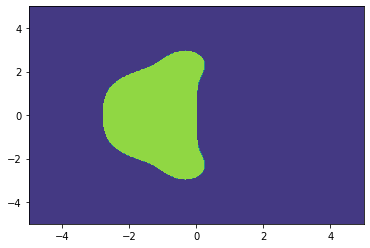

In [20]:
#amplification factor for Runge-Kutta Method
midpoint_amp = lambda z: (1 + z + (1/2)*(z**2) + (1/6)*(z**3) + (1/24)*(z**4))
stabilityPlot(midpoint_amp)